# 公众号【早晚充电】

<img src="https://camo.githubusercontent.com/a1ea5e7b072f0e7aad0fb4e5ad850ef53c7b2e52/687474703a2f2f77782e716c6f676f2e636e2f6d6d686561642f5133617548677a777a4d36533166387944395956614f5743375167357149396e636472336e446854576866696367344c4e4f4c434434512f30", width=420, heigth=240>

# 目的

因为一个同学让我解决的问题。问题就是对一份数据用两种算法实现二分类。于是就借鉴网上实现的算法，进行修改，使其适应这份数据。并补充相关资料，使其更加容易理解算法实现及结果。文中资料如有侵权，请告知删除。

# 【决策树分类方案--银行精准营销】

实现算法为ID3和C4.5两种算法<br>
思路参考：<a>https://blog.csdn.net/weixin_40683253/article/details/81941583?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task</a>

不错的资料：https://zhuanlan.zhihu.com/p/68765482

<img src="./01.png", width=820, heigth=240>
<img src="./02.png", width=820, heigth=240>

## 数据说明：

### 客户信息：
Age：年龄<br>
Job：工作，工作类型（分类：“行政管理”、“蓝领”、“企业家”、“女佣”、“管理”、 “退休”、“个体户”、“服务”、“学生”、“技术员”、“失业”、“未知”）<br>
Marital：婚姻，婚姻状况（分类：离婚，已婚，单身，未知）（注：“离婚”指离婚或丧偶）<br>
Education：教育（分类：‘基本.4y’，‘Basy.6y’，‘Basy.9y’’，‘Health.学校’，‘文盲’，‘专业’课程，‘大学学位’，‘未知’）<br>
Default：违约，信用违约吗？（分类：“不”，“是”，“不知道”）<br>
Housing：房，有住房贷款吗？（分类：“不”，“是”，“不知道”）<br>
Loan：贷款，有个人贷款吗？（（分类：“不”，“是”，“不知道”）<br>

### 预测相关的其他数据：
Contact：接触方式（分类：“移动电话”，“固定电话”）<br>
Month：月，最后一个联系月份（分类：‘MAR’，…，‘NOV’，’DEC’）<br>
Day_of_week：每周的天数，最后一周的联系日（分类）：“Mon”、“Tee”、“We”、“TUU”、“FRI”<br>
Duration：持续时间，最后的接触持续时间，以秒为单位<br>
Campaign：在这次战役和这个客户联系的执行人数量<br>
Pdays：客户上次从上次活动中联系过去之后的天数（数字；999表示以前没有联系过客户）<br>
Previous：本次活动之前和本客户端的联系人数（数字）<br>
Proutcome：前一次营销活动的结果（分类：失败，不存在，成功）<br>

### 社会和经济背景属性
EMP.var.rate：就业变化率-季度指标（数字）<br>
cons.price.idx：消费者价格指数-月度指标（数字）<br>
cons.conf.idx：消费者信心指数-月度指标（数字）<br>
euribor3m:：欧元同业拆借利率3个月利率-每日指标（数字）<br>
nr.employed：员工人数-季度指标（数字）<br>

### 输出变量：
Y -客户是否会定期存款？“是”、“否”<br>













这里两种算法实现选取的**数据特征为：marital；housing；loan；contact；标签：y<br>**
为了更好的可视化我们的决策树，实现两种算法具体实现的探索<br>
ps.去除了其他离散值太多的特征。使画的决策树更好看，更容易理解我们的决策树的生成<br>

如下图,看看我们扔进算法的数据长什么样子

In [85]:
datafile = './demodemo.csv'#文件所在位置，u为防止路径中有中文名称
pd.read_csv(datafile,encoding = 'gb18030').head(5)

,ID,marital,housing,loan,contact,y
0,1,married,yes,no,unknown,否
1,2,divorced,yes,no,cellular,否
2,3,married,yes,no,unknown,否
3,4,single,no,yes,unknown,否
4,5,single,no,no,cellular,否


# 01代码实现 - ID3算法

In [94]:
from math import log
import operator
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
 
# 计算数据的熵(entropy)-原始熵
def dataentropy(data, feat):  
    lendata=len(data)  # 数据条数
    labelCounts={} # 数据中不同类别的条数
    for featVec in data:
        category=featVec[-1] # 每行数据的最后一个字（叶子节点）
        if category not in labelCounts.keys():
            labelCounts[category]=0 
        labelCounts[category]+=1  # 统计有多少个类以及每个类的数量
    entropy=0
    for key in labelCounts:
        prob=float(labelCounts[key])/lendata # 计算单个类的熵值
        entropy-=prob*log(prob,2) # 累加每个类的熵值
    return entropy
 
 
# 处理后导入数据数据
def Importdata(datafile): 
    dataa = pd.read_csv(datafile,encoding = 'gb18030')#datafile是excel文件，所以用read_excel,如果是csv文件则用read_csv
    #将文本中不可直接使用的文本变量替换成数字

    productDict={'married':0, 'divorced':1,'single':2, 'no':0, 'yes':1,  'cellular':0, 'telephone':1, 'unknown':2, '否':0, '是':1}

    
    dataa['marital'] = dataa['marital'].map(productDict)
#     dataa['education'] = dataa['education'].map(productDict)   
#     dataa['default'] = dataa['default'].map(productDict)
    dataa['housing'] = dataa['housing'].map(productDict)
    dataa['loan'] = dataa['loan'].map(productDict)
    dataa['contact'] = dataa['contact'].map(productDict)
    dataa['y'] = dataa['y'].map(productDict)

    data = dataa.iloc[:,1:].values.tolist()#取量化后的几列，去掉文本列
    b = dataa.iloc[0:0,1:-1]
    labels = b.columns.values.tolist()#将标题中的值存入列表中
    return data,labels
 
# 按某个特征value分类后的数据
def splitData(data,i,value): 
    splitData=[]
    for featVec in data:
        if featVec[i]==value:
            rfv =featVec[:i]
            rfv.extend(featVec[i+1:])
            splitData.append(rfv)
    return splitData

# 选择最优的分类特征
def BestSplit(data):  
    numFea = len(data[0])-1#计算一共有多少个特征，因为最后一列一般是分类结果，所以需要-1
    baseEnt = dataentropy(data,-1)   # 定义初始的熵,用于对比分类后信息增益的变化
    bestInfo = 0
    bestFeat = -1
    for i in range(numFea):
        featList = [rowdata[i] for rowdata in data]
        uniqueVals = set(featList)
        newEnt = 0
        for value in uniqueVals:
            subData = splitData(data,i,value)#获取按照特征value分类后的数据
            prob =len(subData)/float(len(data))
            newEnt +=prob*dataentropy(subData,i)  # 按特征分类后计算得到的熵
        info = baseEnt - newEnt  # 原始熵与按特征分类后的熵的差值，即信息增益
        if (info>bestInfo):   # 若按某特征划分后，若infoGain大于bestInf，则infoGain对应的特征分类区分样本的能力更强，更具有代表性。 
            bestInfo=info #将infoGain赋值给bestInf，如果出现比infoGain更大的信息增益，说明还有更好地特征分类
            bestFeat = i #将最大的信息增益对应的特征下标赋给bestFea，返回最佳分类特征
    return bestFeat 
 
#按分类后类别数量排序，取数量较大的
def majorityCnt(classList):    
    c_count={}
    for i in classList:
        if i not in c_count.keys():
            c_count[i]=0
        c_count[i]+=1
    ClassCount = sorted(c_count.items(),key=operator.itemgetter(1),reverse=True)#按照统计量降序排序
    return ClassCount[0][0]#reverse=True表示降序，因此取[0][0]，即最大值
 
#建树
def createTree(data,labels):
    classList = [rowdata[-1] for rowdata in data]  # 取每一行的最后一列，分类结果（1/0）
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(data[0])==1:
        return majorityCnt(classList)
    bestFeat = BestSplit(data) #根据信息增益选择最优特征
    bestLab = labels[bestFeat]
    myTree = {bestLab:{}} #分类结果以字典形式保存
    del(labels[bestFeat])
    featValues = [rowdata[bestFeat] for rowdata in data]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestLab][value] = createTree(splitData(data,bestFeat,value),subLabels)
    return myTree
 

        
# ==================================
datafile = './demodemo.csv'#文件所在位置，u为防止路径中有中文名称
data, labels=Importdata(datafile)  # 导入数据
myTree_id3 = createTree(data, labels)
print(myTree_id3)  # 输出决策树模型结果

{'contact': {0: {'housing': {0: {'loan': {0: {'marital': {0: 1, 1: 1, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 1}}}}, 1: {'loan': {0: {'marital': {0: 0, 1: 0, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 0}}}}}}, 1: {'housing': {0: {'loan': {0: {'marital': {0: 1, 1: 1, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 0}}}}, 1: {'loan': {0: {'marital': {0: 0, 1: 0, 2: 0}}, 1: {'marital': {0: 0, 1: 0, 2: 1}}}}}}, 2: {'marital': {0: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}, 1: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}, 2: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}}}}}


# 画决策树代码-treePlotter

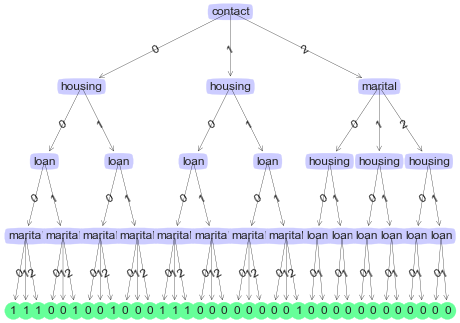

In [95]:
#绘制决策树
import matplotlib.pyplot as plt
 
# 定义文本框和箭头格式，boxstyle用于指定边框类型，color表示填充色
decisionNode = dict(boxstyle="round4", color='#ccccff')  #定义判断结点为圆角长方形，填充浅蓝色
leafNode = dict(boxstyle="circle", color='#66ff99')  #定义叶结点为圆形，填充绿色
# arrow_args = dict(arrowstyle="<-", color='ffcc00')  #定义箭头及颜色
arrow_args = dict(arrowstyle='<-') 
 
#绘制带箭头的注释
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
 
 
#计算叶结点数
def getNumLeafs(myTree):
    numLeafs = 0
   # firstStr = myTree.keys()[0]
    firstStr = list(myTree.keys())[0]  #python3写法
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs
 
 
#计算树的层数
def getTreeDepth(myTree):
    maxDepth = 0
#     firstStr = myTree.keys()[0]
    firstStr = list(myTree.keys())[0]  #python3写法
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
 
 
#在父子结点间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
 
 
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
#     firstStr = myTree.keys()[0]
    firstStr = list(myTree.keys())[0] #python3写法
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)  #在父子结点间填充文本信息
    plotNode(firstStr, cntrPt, parentPt, decisionNode)  #绘制带箭头的注释
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
 
 
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW;
    plotTree.yOff = 1.0;
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
    
        
#=================================
createPlot(myTree_id3)

# 代码实现 - C4.5算法
C4.5算法和ID3算法逻辑很相似，只是ID3算法是用信息增益来选择特征，而C4.5算法是用的信息增益率，因此对代码的影响也只有BestSplit(data)<br>
函数的定义部分，只需要加一个信息增益率的计算即可<br>
BestSplit(data)函数定义代码更改后如下：<br>

In [96]:
# 选择最优的分类特征
def BestSplit_c4(data):  
    numFea = len(data[0])-1#计算一共有多少个特征，因为最后一列一般是分类结果，所以需要-1
    baseEnt = dataentropy(data,-1)   # 定义初始的熵,用于对比分类后信息增益的变化
    bestGainRate = 0
    bestFeat = -1
    for i in range(numFea):
        featList = [rowdata[i] for rowdata in data]
        uniqueVals = set(featList)
        newEnt = 0
        for value in uniqueVals:
            subData = splitData(data,i,value)#获取按照特征value分类后的数据
            prob =len(subData)/float(len(data))
            newEnt +=prob*dataentropy(subData,i)  # 按特征分类后计算得到的熵
        info = baseEnt - newEnt  # 原始熵与按特征分类后的熵的差值，即信息增益
        splitonfo = dataentropy(subData,i) #分裂信息
        if splitonfo == 0:#若特征值相同（eg:长相这一特征的值都是帅），即splitonfo和info均为0，则跳过该特征
            continue
        GainRate = info/splitonfo #计算信息增益率
        if (GainRate>bestGainRate):   # 若按某特征划分后，若infoGain大于bestInf，则infoGain对应的特征分类区分样本的能力更强，更具有代表性。 
            bestGainRate=GainRate #将infoGain赋值给bestInf，如果出现比infoGain更大的信息增益，说明还有更好地特征分类
            bestFeat = i #将最大的信息增益对应的特征下标赋给bestFea，返回最佳分类特征
    return bestFeat 

In [97]:
# #建树
def createTree_c4(data,labels):
    classList = [rowdata[-1] for rowdata in data]  # 取每一行的最后一列，分类结果（1/0）
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(data[0])==1:
        return majorityCnt(classList)
    bestFeat = BestSplit_c4(data) #根据信息增益选择最优特征
    bestLab = labels[bestFeat]
    myTree = {bestLab:{}} #分类结果以字典形式保存
    del(labels[bestFeat])
    featValues = [rowdata[bestFeat] for rowdata in data]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestLab][value] = createTree(splitData(data,bestFeat,value),subLabels)
    return myTree


        
# ==================================
datafile = './demodemo.csv'#文件所在位置，u为防止路径中有中文名称
data, labels=Importdata(datafile)  # 导入数据
myTree_c4 = createTree_c4(data, labels)
print(myTree_c4)  # 输出决策树模型结果

{'contact': {0: {'housing': {0: {'loan': {0: {'marital': {0: 1, 1: 1, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 1}}}}, 1: {'loan': {0: {'marital': {0: 0, 1: 0, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 0}}}}}}, 1: {'housing': {0: {'loan': {0: {'marital': {0: 1, 1: 1, 2: 1}}, 1: {'marital': {0: 0, 1: 0, 2: 0}}}}, 1: {'loan': {0: {'marital': {0: 0, 1: 0, 2: 0}}, 1: {'marital': {0: 0, 1: 0, 2: 1}}}}}}, 2: {'marital': {0: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}, 1: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}, 2: {'housing': {0: {'loan': {0: 0, 1: 0}}, 1: {'loan': {0: 0, 1: 0}}}}}}}}


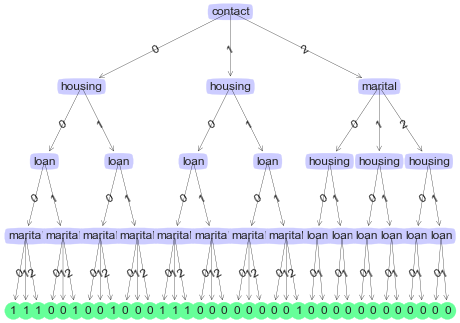

In [98]:
createPlot(myTree_c4)

## 如果你想了解更多关于银行精准营销的方案，可以看看这个
## 这是一个数据科学比赛的解决方案。里面非常全。完整的给出了一个机器学习数据处理探索过程。非常值得学习!
<a>https://nbviewer.jupyter.org/github/suu1994/kesci/tree/master/<a/>
